<a href="https://colab.research.google.com/github/Kanahe1800/hanami-bloom-prediction/blob/main/Forest_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import pandas as pd

In [ ]:
# from google.colab import files
# files.upload()

In [2]:
%%capture
!unzip city_bloom_data.zip

Archive:  city_bloom_data.zip
replace city_bloom_data/Toyama_with_bloom_day_and_week_of_year.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

Loading the data

In [29]:
df = pd.read_csv("/content/city_bloom_data/Tokyo_with_bloom_day_and_week_of_year.csv")
df.head()

,seasonal_year,Nov_prec,Dec_prec,Jan_prec,Feb_prec,Mar_prec,Nov_temp_y,Dec_temp_y,Jan_temp_y,Feb_temp_y,Mar_temp_y,bloom_day_of_year,bloom_week_of_year
0,1981,10.0,7.0,4.0,6.0,12.0,12.518799,6.507965,3.126923,4.589691,8.504944,98,15
1,1982,8.0,3.0,2.0,8.0,11.0,10.232117,6.709778,4.623016,4.067139,8.671631,90,13
2,1983,13.0,6.0,5.0,7.0,13.0,13.176056,7.877563,4.362427,4.338379,7.429413,98,14
3,1984,10.0,6.0,7.0,5.0,11.0,10.639465,5.070892,2.584167,2.112549,5.026306,108,16
4,1985,5.0,4.0,3.0,9.0,19.0,11.577362,6.488251,2.912292,5.886322,8.130371,100,15


In [30]:
labels = df["bloom_week_of_year"].copy()

attributes = df.drop(["seasonal_year","bloom_day_of_year", "bloom_week_of_year"], axis=1)

In [14]:
# print(features)
# print(attributes)

In [50]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor

kf = KFold(n_splits=10, shuffle=True, random_state=42)


forest_reg = make_pipeline(
    # StandardScaler(),
    RandomForestRegressor(random_state=42, max_depth=4)
)

forest_rmses = -cross_val_score(
    forest_reg,
    attributes,
    labels,
    scoring="neg_root_mean_squared_error",
    cv=kf
)

print("RMSE per fold:", forest_rmses)
print("Mean RMSE:", forest_rmses.mean())

RMSE per fold: [0.53022744 0.95624837 0.42749125 0.31550016 0.36386829 0.58803438
 0.41318308 0.99816515 0.75924596 0.86426931]
Mean RMSE: 0.6216233390494513


In [51]:
import numpy as np
import pandas as pd

fitted_forest = forest_reg.fit(attributes, labels)

importances = fitted_forest.named_steps['randomforestregressor'].feature_importances_
feature_names = attributes.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values('Importance', ascending=False)

print(importance_df)


      Feature  Importance
9  Mar_temp_y    0.606457
7  Jan_temp_y    0.115515
8  Feb_temp_y    0.106460
5  Nov_temp_y    0.048415
0    Nov_prec    0.031891
6  Dec_temp_y    0.029664
4    Mar_prec    0.023234
2    Jan_prec    0.022847
3    Feb_prec    0.010764
1    Dec_prec    0.004753


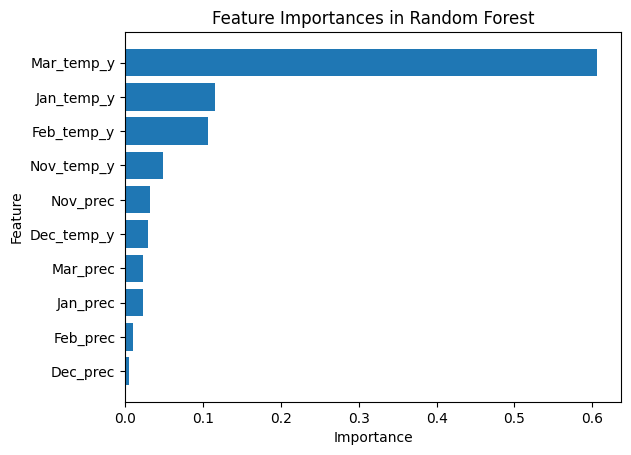

In [52]:
import matplotlib.pyplot as plt

plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in Random Forest')
plt.gca().invert_yaxis()
plt.show()


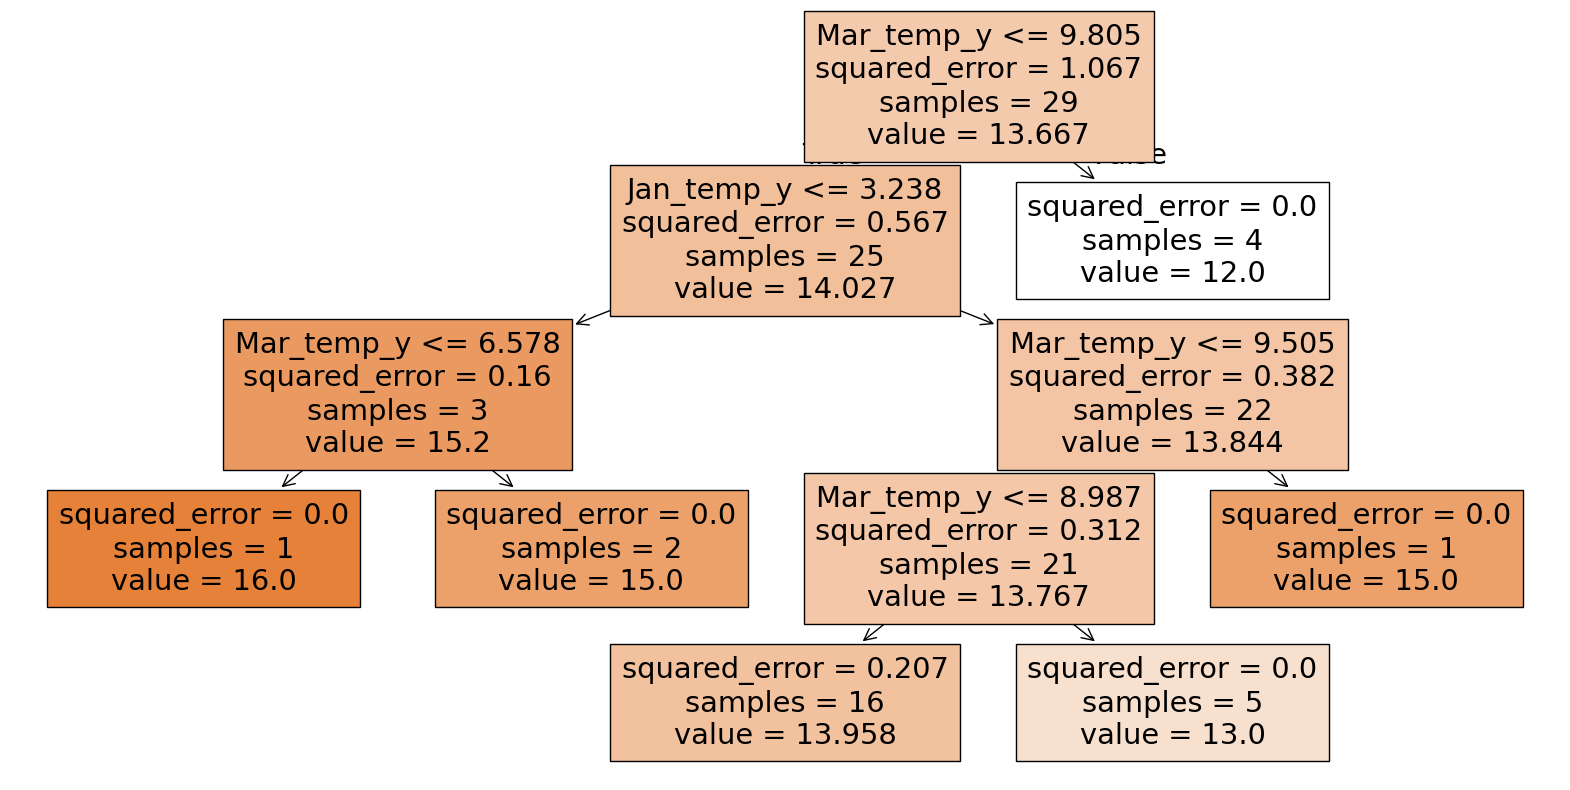

In [53]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

estimator = fitted_forest.named_steps['randomforestregressor'].estimators_[0]

plt.figure(figsize=(20, 10))
plot_tree(estimator, filled=True, feature_names=attributes.columns)
plt.show()


In [54]:
from joblib import dump


dump(fitted_forest, 'tokyo.pkl')


['tokyo.pkl']